In [2]:
import pandas as pd
import matplotlib
import math
%matplotlib inline 

In [3]:
print('DOTSCIENCE_INPUTS=["gov_data_air_quality"]')
print('DOTSCIENCE_OUTPUTS=["input_data"]')
print('DOTSCIENCE_LABELS={"model_type": "data_cleaning"}')

DOTSCIENCE_INPUTS=["gov_data_air_quality"]
DOTSCIENCE_OUTPUTS=["input_data"]
DOTSCIENCE_LABELS={"model_type": "data_cleaning"}


We have taken data on the particulates in the air in London from (www.londonair.org.uk)[www.londonair.org.uk].

In particular, we chose data on:
* Nitric Oxide (NO)
* Nitrogen dioxide (N2)
* Oxides of nitrogen (NOX) 
* PM2.5 Particulate (PM2.5)
* Sulphur Dioxide (SO2)

(all measured in ug/m3).

The air was sampled at Haringey Town Hall at 15 minute intervals between 1st June 2018 and 30th June 2018.

[Query entered here](https://www.londonair.org.uk/london/asp/datasite.asp?CBXSpecies1=NOm&CBXSpecies2=NO2m&CBXSpecies3=NOXm&CBXSpecies5=PM25m&CBXSpecies6=SO2m&day1=1&month1=jun&year1=2018&day2=30&month2=jun&year2=2018&period=15min&ratidate=&site=HG1&res=6&Submit=Replot+graph)

In [4]:
df = pd.read_csv('https://www.londonair.org.uk/london/asp/downloadsite.asp?site=HG1&species1=NOm&species2=NO2m&species3=NOXm&species4=PM25m&species5=SO2m&species6=&start=1-jun-2018&end=30-jun-2018&res=6&period=15min&units=ugm3')

## Save the raw data, and point Dotscience to it.

In [5]:
### DOTSCIENCE TO DO: add input dataset.

This will put the data under version control

In [6]:
df.to_csv("input_data/raw_air_data_harringey.csv")

Let's take a look at the data:

In [7]:
df

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,HG1,NO,01/06/2018 00:00,2.7,ug m-3,P
1,HG1,NO,01/06/2018 00:15,3.0,ug m-3,P
2,HG1,NO,01/06/2018 00:30,4.7,ug m-3,P
3,HG1,NO,01/06/2018 00:45,NaN,ug m-3,P
4,HG1,NO,01/06/2018 01:00,NaN,ug m-3,P
5,HG1,NO,01/06/2018 01:15,1.6,ug m-3,P
6,HG1,NO,01/06/2018 01:30,8.1,ug m-3,P
7,HG1,NO,01/06/2018 01:45,1.7,ug m-3,P
8,HG1,NO,01/06/2018 02:00,8.0,ug m-3,P
9,HG1,NO,01/06/2018 02:15,6.6,ug m-3,P


There are too many rows to view this easily. The records are sorted by `Species`. Let's see what unique values are in this column:

In [8]:
df.Species.unique()

array(['NO', 'NO2', 'NOX', 'PM2.5', 'SO2'], dtype=object)

We can see that there are five values: `NO` for nitric oxide, `NO2` for nitrogen dioxide, `NOX` for oxides of nitrogen, `Pm2.5` for PM2.5 Particulate, and `S02` for sulphur dioxide. 

How is each measurement recorded?

In [9]:
df.loc[df.ReadingDateTime == "01/06/2018 11:00"]

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
44,HG1,NO,01/06/2018 11:00,26.4,ug m-3,P
2828,HG1,NO2,01/06/2018 11:00,44.2,ug m-3,P
5612,HG1,NOX,01/06/2018 11:00,84.7,ug m-3 as NO2,P
8396,HG1,PM2.5,01/06/2018 11:00,NaN,ug m-3,P
11180,HG1,SO2,01/06/2018 11:00,NaN,ug m-3,P


It appears that each unique time seems to have five records: one for each of the particulates. Let's check that this is true in general.

In [10]:
datetimes_no_data =[]
for date in df.ReadingDateTime:
    if len(df.loc[df.ReadingDateTime == date]) != 5:
        datetimes_no_data.append(date)
        print(date)

if len(datetimes_no_data) == 0:
    print("no datetimes without sample data for all particulates: NO, NO2, NOX, PM2.5 and SO2!")
        

no datetimes without sample data for all particulates: NO, NO2, NOX, PM2.5 and SO2!


Although every timestamp has a record for the particulates we are interested in, it looks like a lot of these are null (`NaN`). We want to remove null values from our data. First, let's check whether any of the other columns have null values:

In [11]:
df.isnull().any()

Site                       False
Species                    False
ReadingDateTime            False
Value                       True
Units                      False
Provisional or Ratified    False
dtype: bool

It is just the `Value` column that has some nulls. Let's see how many nulls it contains:

In [12]:
df['Value'].isnull().sum()

5754

###  Number of null values for each particulate

In [13]:
particulates = [str(array) for array in df.Species.unique()]

nulls_and_nonnulls_per_particulate = zip(particulates, 
                            [len(df.loc[(df.Value.isnull()) & (df.Species == particulate)]) for particulate in particulates],
                            [(len(df.loc[(df.Species == particulate)])) for particulate in particulates]
                           )


print("particulate: null values: non-null values:")
for (a, b, c) in nulls_and_nonnulls_per_particulate:
    print(a, "\t\t", b, "\t\t", c-b)
    
    

particulate: null values: non-null values:
NO 		 62 		 2722
NO2 		 62 		 2722
NOX 		 62 		 2722
PM2.5 		 2784 		 0
SO2 		 2784 		 0


So, all of our records for PM2.5 and SO2 are null. 62 of our records for the remaining particulates are null.

Let's go ahead and drop the null values:


## Removing null values

All the PM2.5 and SO2 measures are null, so let's remove those records altogether from our dataframe. 
The remaining particulates just have a few nulls, so rather than dropping the timestamps with null measurements, we will replace those with the mean values. 

### Drop the PM2.5 and SO2 rows


In [14]:
rows_to_drop = df.index[df['Species'] == "SO2"].tolist() + df.index[df['Species'] == "PM2.5"].tolist()


In [15]:
len(rows_to_drop)

5568

In [16]:
#df.dropna(inplace = True)

In [17]:
df.drop(df.index[rows_to_drop], inplace = True)


In [18]:
len(df)

8352

Now, let's save this dataset. We'll give it a new name to preserve the raw data saved earlier.

In [19]:
df.to_csv("input_data/nonnull_air_data_harringey.csv")

Then, we can replace those 62 null NO, NO2 and NOX measurements with their respective means.

In [20]:
NO_rows = df.index[df['Species'] == "NO"].tolist()
NO2_rows = df.index[df['Species'] == "NO2"].tolist()
NOX_rows = df.index[df['Species'] == "NOX"].tolist()

In [21]:
NaN_NO_locs = []
NaN_NO2_locs = []
NaN_NOX_locs = []

for row in NO_rows:
    if math.isnan(df.at[row, "Value"]):
        NaN_NO_locs.append(row)
        
for row in NO2_rows:
    if math.isnan(df.at[row, "Value"]):
        NaN_NO2_locs.append(row)    
        
for row in NOX_rows:
    if math.isnan(df.at[row, "Value"]):
        NaN_NOX_locs.append(row)

In [22]:
print(len(NaN_NO_locs), len(NaN_NO2_locs), len(NaN_NOX_locs))

62 62 62


Great! We've caught the locations of the 62 `NaN` particulate values. Now lets change each of these missing particulate values to the mean value for that particulate over the time sampled.

In [23]:
NO_mean = df.loc[NO_rows]["Value"].mean()
NO2_mean = df.loc[NO2_rows]["Value"].mean()
NOX_mean = df.loc[NOX_rows]["Value"].mean()

# loop through the values, updating the NaNs to the respective mean values
for nan_loc in NaN_NO_locs:
    df.at[nan_loc, 'Value'] = NO_mean
    
for nan_loc in NaN_NO2_locs:
    df.at[nan_loc, 'Value'] = NO2_mean

for nan_loc in NaN_NOX_locs:
    df.at[nan_loc, 'Value'] = NOX_mean

Now we should have removed or updated all the null values!

In [24]:
df['Value'].isnull().sum()

0

Woohoo! Let's celebrate by saving the null-free dataframe. We can overwrite the previous `nonnull_air_data_harringey.csv` and dotsience will save the version history.

In [25]:
df.to_csv("input_data/nonnull_air_data_harringey.csv")

In [26]:
df.describe(include='all')


,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
count,8352,8352,8352,8352.000000,8352,8352
unique,1,3,2784,NaN,2,1
top,HG1,NO,16/06/2018 13:45,NaN,ug m-3,P
freq,8352,2784,3,NaN,5568,8352
mean,NaN,NaN,NaN,31.523549,NaN,NaN
std,NaN,NaN,NaN,23.012615,NaN,NaN
min,NaN,NaN,NaN,-0.700000,NaN,NaN
25%,NaN,NaN,NaN,15.100000,NaN,NaN
50%,NaN,NaN,NaN,27.400000,NaN,NaN
75%,NaN,NaN,NaN,42.100000,NaN,NaN


In [27]:
type(df.values)

numpy.ndarray

In [28]:
df.loc[df['Species'] == 'NO']['Value'].values

array([2.7, 3. , 4.7, ..., 4.2, 8.6, 4.7])

In [29]:
type(df['Value'].values)

numpy.ndarray

In [30]:
x = df.ReadingDateTime.unique()


In [ ]:
import matplotlib.pyplot as plt

y1 = df.loc[df['Species'] == 'NO']['Value'].values
y2 = df.loc[df['Species'] == 'NO2']['Value'].values
y3 = df.loc[df['Species'] == 'NOX']['Value'].values

# get the datetimes



plt.plot(x, y1, label='NO')
plt.plot(x, y2, label='NO2')
plt.plot(x, y3, label='NOX')



In [1]:
df_array = df.values




NameError: name 'df' is not defined

In [ ]:
df_array[:, [1]]

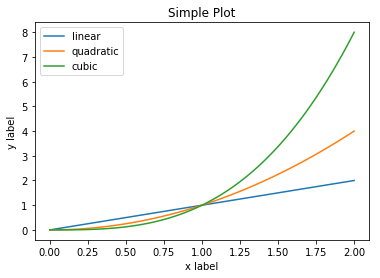

In [139]:
import numpy as np

x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title("Simple Plot")

plt.legend()

plt.show()

In [ ]:
## hacky summary stat used to try to get a commit made

In [ ]:
import json

print('DOTSCIENCE_PARAMETERS=' + json.dumps({"features": "blah"}))

print('DOTSCIENCE_SUMMARY=' + json.dumps({"thing": 1}))

